In [1]:
import pandas as pd
import numpy as np

In [5]:
berichte = pd.read_csv(r"../out/Polizeiberichte_transformed.csv", sep=";", encoding="UTF-8")

In [6]:
berichte.head()

,Timestamp,Ueberschrift,Hauptartikel,Link,Datum,Ort,Sekundaerer Ort,Author,Ueberschrift_clean,Ueberschrift_lem,...,Ueberschrift_split,Ueberschrift_clean2,Ueberschrift_lem2,Ueberschrift_lem_clean2,Ueberschrift_lem_clean_no_stop,Ueberschrift_kombi,Hauptartikel_clean,Hauptartikel_lem,Hauptartikel_lemm_clean,Hauptartikel_lem_clean_no_stop
0,2019-04-30 13:34:00,Inbrandsetzung von Sperrmüll - Polizei sucht Z...,(ne) Am frühen Samstagmorgen um kurz vor 6:00...,https://www.presseportal.de/blaulicht/pm/4970/...,NaN,Heddernheim,NaN,ne,inbrandsetzung von sperrmüll polizei sucht z...,inbrandsetzung von sperrmüll polizei suchen...,...,Inbrand Setzung Sperr Müll,inbrand setzung sperr müll,inbrand setzung sperr müll,inbrand setzung sperr müll,inbrand setzung sperr müll,inbrand setzung sperr müll inbrandsetzung sper...,ne am frühen samstagmorgen um kurz vor uh...,ne am früh samstagmorgen um kurz vor u...,ne am früh samstagmorgen um kurz vor u...,sperrmüll abgestellt küche grundstück straße ...
1,2019-04-30 13:33:00,Zwei Autos abgebrannt,(ka) In der Nacht von Montag auf Dienstag bra...,https://www.presseportal.de/blaulicht/pm/4970/...,NaN,Bornheim,NaN,ka,zwei autos abgebrannt,zwei autos abbrennen,...,Autos Abb Rennen,autos abb rennen,autos abb rennen,autos abb rennen,autos abb rennen,autos abb rennen autos abbrennen,ka in der nacht von montag auf dienstag bra...,ka in der nacht von montag auf dienstag b...,ka in der nacht von montag auf dienstag b...,brennen autos ilbenstädter straße ecke nußbau...
2,2019-04-30 08:54:00,Lastwagenfahrer fährt auf Polizisten zu und ve...,(ka) Gestern Abend konnte ein Polizeibeamter ...,https://www.presseportal.de/blaulicht/pm/4970/...,NaN,Bundesautobahn,NaN,ka,lastwagenfahrer fährt auf polizisten zu und ve...,lastwagenfahrer fahren auf polizisten zu und v...,...,Lastwagen Fahrer Ver Suchen ...,lastwagen fahrer ver suchen ...,lastwagen fahrer ver suchen ...,lastwagen fahrer ver suchen ...,lastwagen fahrer,lastwagen fahrer lastwagenfahrer fahren polizi...,ka gestern abend konnte ein polizeibeamter ...,ka gestern abend können einen polizeibeam...,ka gestern abend können einen polizeibeam...,polizeibeamter sekunde zufahrenden lastwagen ...
3,2019-04-30 08:40:00,Bauarbeiter schwer verletzt,(em) Gestern Nachmittag (29.04.2019) wurde ei...,https://www.presseportal.de/blaulicht/pm/4970/...,NaN,Bahnhofsviertel,NaN,em,bauarbeiter schwer verletzt,bauarbeiter schwer verletzen,...,Bau Arbeiter Sch Wer,bau arbeiter sch wer,bau arbeiter sch wer,bau arbeiter sch wer,bau arbeiter,bau arbeiter bauarbeiter schwer verletzen,em gestern nachmittag wurde ein jähriger...,em gestern nachmittag werden einen j...,em gestern nachmittag werden einen j...,arbeiter baustelle elbestraße schwer verletzen...
4,2019-04-29 11:17:00,Fahrradcodieraktion zum Frühlingsfest,(ne)Das 6. Polizeirevier wird im Rahmen eines...,https://www.presseportal.de/blaulicht/pm/4970/...,NaN,Bornheim,NaN,ne,fahrradcodieraktion zum frühlingsfest,fahrradcodieraktion zum frühlingsfest,...,Frühlings Fest,frühlings fest,frühlings fest,frühlings fest,frühlings fest,frühlings fest fahrradcodieraktion frühlingsfest,ne das polizeirevier wird im rahmen eines ...,ne der polizeirevier werden im rahmen ei...,ne der polizeirevier werden im rahmen ei...,rahmen frühlingsfestes seniorenwohnheim pauli...


In [8]:
# Make timestamps datetime
berichte["Timestamp"] = pd.to_datetime(berichte["Timestamp"])
berichte["Datum"] = pd.to_datetime(berichte["Datum"])

In [9]:
# Calculate differences between time of occurence (Date) and time of publishing (Timestamp)
publishing_delay = berichte["Timestamp"].dt.date - berichte["Datum"].dt.date
publishing_delay.describe()

count     0
unique    0
dtype: int64

In [22]:
# How many articles did each author publish?
berichte["Author"].value_counts()

fue      1084
em        758
ka        591
mc        534
ne        500
as        422
re        169
va        141
we        138
sky        59
ts         41
kie        19
cje        13
le         12
tb         10
be          9
ki          9
md          8
pe          7
ak          6
an          5
sms         5
hol         5
me          5
nk          5
he          4
hs          3
fu          3
mj          2
lö          2
reem        2
dwe         2
emas        2
neu         2
aa          2
cjeem       1
le ka       1
ds          1
kane        1
lt          1
kam         1
pl          1
emgf        1
emki        1
ab          1
jl          1
kk          1
emne        1
fs          1
mf          1
jhem        1
Name: Author, dtype: int64

In [27]:
berichte = berichte[berichte["Author"].isin(berichte["Author"].value_counts()[0:10].index)]

,Timestamp,Ueberschrift,Hauptartikel,Link,Datum,Ort,Sekundaerer Ort,Author,Ueberschrift_clean,Ueberschrift_lem,...,Ueberschrift_split,Ueberschrift_clean2,Ueberschrift_lem2,Ueberschrift_lem_clean2,Ueberschrift_lem_clean_no_stop,Ueberschrift_kombi,Hauptartikel_clean,Hauptartikel_lem,Hauptartikel_lemm_clean,Hauptartikel_lem_clean_no_stop
0,2019-04-30 13:34:00,Inbrandsetzung von Sperrmüll - Polizei sucht Z...,(ne) Am frühen Samstagmorgen um kurz vor 6:00...,https://www.presseportal.de/blaulicht/pm/4970/...,NaT,Heddernheim,NaN,ne,inbrandsetzung von sperrmüll polizei sucht z...,inbrandsetzung von sperrmüll polizei suchen...,...,Inbrand Setzung Sperr Müll,inbrand setzung sperr müll,inbrand setzung sperr müll,inbrand setzung sperr müll,inbrand setzung sperr müll,inbrand setzung sperr müll inbrandsetzung sper...,ne am frühen samstagmorgen um kurz vor uh...,ne am früh samstagmorgen um kurz vor u...,ne am früh samstagmorgen um kurz vor u...,sperrmüll abgestellt küche grundstück straße ...
1,2019-04-30 13:33:00,Zwei Autos abgebrannt,(ka) In der Nacht von Montag auf Dienstag bra...,https://www.presseportal.de/blaulicht/pm/4970/...,NaT,Bornheim,NaN,ka,zwei autos abgebrannt,zwei autos abbrennen,...,Autos Abb Rennen,autos abb rennen,autos abb rennen,autos abb rennen,autos abb rennen,autos abb rennen autos abbrennen,ka in der nacht von montag auf dienstag bra...,ka in der nacht von montag auf dienstag b...,ka in der nacht von montag auf dienstag b...,brennen autos ilbenstädter straße ecke nußbau...
2,2019-04-30 08:54:00,Lastwagenfahrer fährt auf Polizisten zu und ve...,(ka) Gestern Abend konnte ein Polizeibeamter ...,https://www.presseportal.de/blaulicht/pm/4970/...,NaT,Bundesautobahn,NaN,ka,lastwagenfahrer fährt auf polizisten zu und ve...,lastwagenfahrer fahren auf polizisten zu und v...,...,Lastwagen Fahrer Ver Suchen ...,lastwagen fahrer ver suchen ...,lastwagen fahrer ver suchen ...,lastwagen fahrer ver suchen ...,lastwagen fahrer,lastwagen fahrer lastwagenfahrer fahren polizi...,ka gestern abend konnte ein polizeibeamter ...,ka gestern abend können einen polizeibeam...,ka gestern abend können einen polizeibeam...,polizeibeamter sekunde zufahrenden lastwagen ...
3,2019-04-30 08:40:00,Bauarbeiter schwer verletzt,(em) Gestern Nachmittag (29.04.2019) wurde ei...,https://www.presseportal.de/blaulicht/pm/4970/...,NaT,Bahnhofsviertel,NaN,em,bauarbeiter schwer verletzt,bauarbeiter schwer verletzen,...,Bau Arbeiter Sch Wer,bau arbeiter sch wer,bau arbeiter sch wer,bau arbeiter sch wer,bau arbeiter,bau arbeiter bauarbeiter schwer verletzen,em gestern nachmittag wurde ein jähriger...,em gestern nachmittag werden einen j...,em gestern nachmittag werden einen j...,arbeiter baustelle elbestraße schwer verletzen...
4,2019-04-29 11:17:00,Fahrradcodieraktion zum Frühlingsfest,(ne)Das 6. Polizeirevier wird im Rahmen eines...,https://www.presseportal.de/blaulicht/pm/4970/...,NaT,Bornheim,NaN,ne,fahrradcodieraktion zum frühlingsfest,fahrradcodieraktion zum frühlingsfest,...,Frühlings Fest,frühlings fest,frühlings fest,frühlings fest,frühlings fest,frühlings fest fahrradcodieraktion frühlingsfest,ne das polizeirevier wird im rahmen eines ...,ne der polizeirevier werden im rahmen ei...,ne der polizeirevier werden im rahmen ei...,rahmen frühlingsfestes seniorenwohnheim pauli...
5,2019-04-29 11:12:00,-Jähriger verletzt Polizisten,(ka) Gestern Nachmittag leistete ein Mann im ...,https://www.presseportal.de/blaulicht/pm/4970/...,NaT,Flughafen,NaN,ka,jähriger verletzt polizisten,jährig verletzen polizisten,...,,,,,NaN,verletzen polizisten,ka gestern nachmittag leistete ein mann im ...,ka gestern nachmittag leisten einen mann ...,ka gestern nachmittag leisten einen mann ...,leisten terminal heftig widerstehen verletzen...
6,2019-04-28 12:34:00,Versuchter Raub in Spielothek,"(fue) Am Sonntag, den 28. April 2019, gegen 0...",https://www.presseportal.de/blaulicht/pm/4970/...,NaT,Nordend,NaN,fue,versuchter raub in spielothek,versucht raub in spielothek,...,Ver Sucht Ra

In [12]:
# Determine number of published articles per author and location
authors_locations_data = berichte[["Author", "Ort"]]
authors = berichte["Author"].unique()

pub_counts_per_author_and_location = pd.DataFrame(index=berichte["Ort"].unique())

for author in authors:
    pub_counts_per_author_and_location[author] = authors_locations_data[authors_locations_data["Author"]==author].groupby(by="Ort").count()
    
pub_counts_per_author_and_location.replace({np.nan: 0}, inplace=True)

Published articles for author ka by location


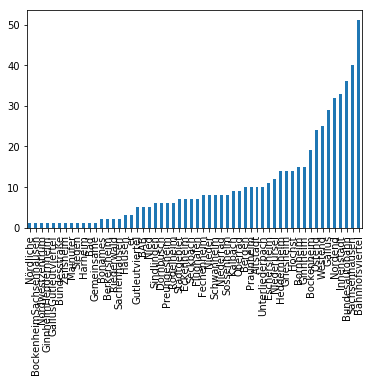

In [14]:
# Counts of published articles by location for an example author
example_author = pub_counts_per_author_and_location.columns[1]
print("Published articles for author {} by location".format(example_author))
pub_counts_per_author_and_location[example_author][pub_counts_per_author_and_location[example_author]!=0].sort_values().plot(kind="bar")

In [15]:
# Top locations for each author
top_locations_by_author = pd.DataFrame(index=[1,2,3])
for author in pub_counts_per_author_and_location.columns:
    top_locations_by_author[author] = pub_counts_per_author_and_location[author].nlargest(n=3).index.sort_values()
top_locations_by_author

,ne,ka,em,fue,nan,neu,pe,ki,me,md,...,sms,lö,ts,sky,tb,be,mf,fs,pl,kk
1,Bahnhofsviertel,Bahnhofsviertel,Bahnhofsviertel,Bahnhofsviertel,Bornheim,Das,Bahnhofsviertel,Bockenheim,Ostend,Bundesautobahn,...,Griesheim,Bornheim,Bahnhofsviertel,Griesheim,Bahnhofsviertel,Bahnhofsviertel,Bahnhofsviertel,Bornheim,Bornheim,Bornheim
2,Innenstadt,Bundesautobahn,Innenstadt,Bundesautobahn,Bundesautobahn,Heddernheim,Bornheim,Flughafen,Rödelheim,Nied,...,Heddernheim,Bundesautobahn,Gallus,Ostend,Bergen,Nordend,Bornheim,Heddernheim,Heddernheim,Heddernheim
3,Nordend,Sachsenhausen,Nordend,Stadtgebiet,Heddernheim,Maintal,Dornbusch,Innenstadt,Westend,Ostend,...,Westend,Heddernheim,Innenstadt,Sachsenhausen,Nordend,Ostend,Heddernheim,Kreis,Pressemitteilung,Main


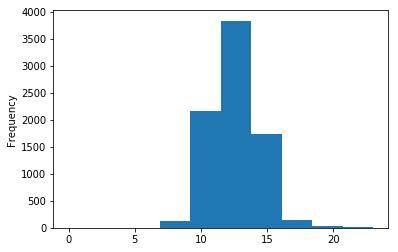

In [16]:
# At which times are articles published?
pub_hours = berichte["Timestamp"].dt.hour
pub_hours.plot(kind="hist")